In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from src.db_connect import RedshiftClient

In [7]:
rds_connect = RedshiftClient()

In [5]:
rds_connect.close()

In [8]:
df = rds_connect.run_query("limits_balances.sql", mode="training")
df.head()

OperationalError: connection to server at "n26-dwh.cfxsmcyyfcch.eu-central-1.redshift.amazonaws.com" (172.30.0.27), port 5439 failed: FATAL:  too many connections for user "ilya_katliarou_reader"


In [5]:
df['ccf'].max()

np.float64(349.759351059036)

In [6]:
df[df['user_id'] == '33874dd4-fbb2-4055-bff8-263f82c69ea1']  # example user_id

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,group_label,limit,balance,ead,avg_utilization_0m,ccf
15543,33874dd4-fbb2-4055-bff8-263f82c69ea1,2025-06-30,write_off_date,2024-06-30,2025-01-16 09:37:01,RP_2,group_3,2750.0,2841.94,17.18,1.033433,0.0


In [33]:
df[((df['group_label']=='group_3') & (df['ccf']>50))].head(50)

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,group_label,limit,balance,ead,avg_utilization_0m,ccf
973,7d08a849-b1a4-4d9e-8a79-beb8517d2273,2019-12-16,dunning_second_reminder_date,2019-01-12 13:34:42.550000,2019-12-27,RP_0,group_3,250.00,227.81,7988.97,0.911240,349.759351
1343,3e5a5968-626c-4984-8217-49ecfe027a77,2020-11-29,dunning_second_reminder_date,2019-11-30 00:00:00.000000,2020-11-30,RP_0,group_3,500.00,436.21,3978.10,0.872420,55.524220
2698,d88a5942-e1d3-4865-91bc-bcd3fc47379b,2021-06-04,dunning_second_reminder_date,2020-11-03 14:58:13.241153,2021-05-25,RP_0,group_3,250.00,220.00,5842.98,0.880000,187.432667
3057,9e91e844-60f5-4679-8221-7387d1882513,2022-06-09,dunning_second_reminder_date,2021-06-09 00:00:00.000000,2022-06-14,RP_0,group_3,250.00,225.08,6062.15,0.900320,234.232343
3425,2af131b3-68e9-4598-8048-ae8fe77031ed,2021-07-26,dunning_second_reminder_date,2020-07-26 00:00:00.000000,2021-07-27,RP_0,group_3,250.00,179.28,6167.90,0.717120,84.680713
6584,c5193e3d-d294-437f-bea0-6bfb1c9a849b,2024-05-09,dpd_90_date,2023-05-15 10:47:02.533384,2023-05-15,RP_0,group_3,33.31,31.31,176.86,0.939958,72.775000


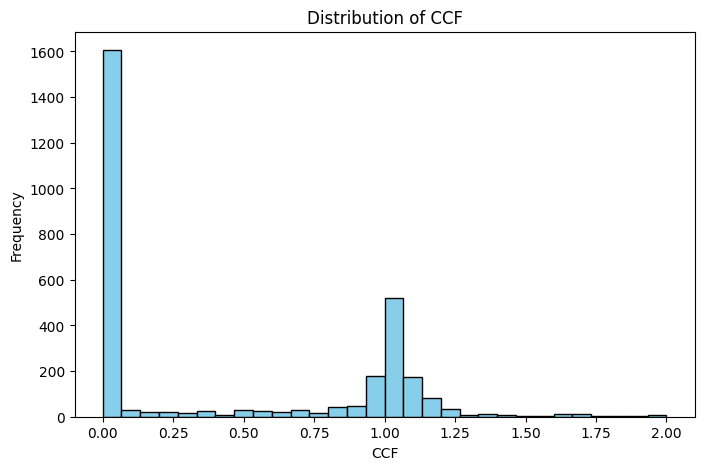

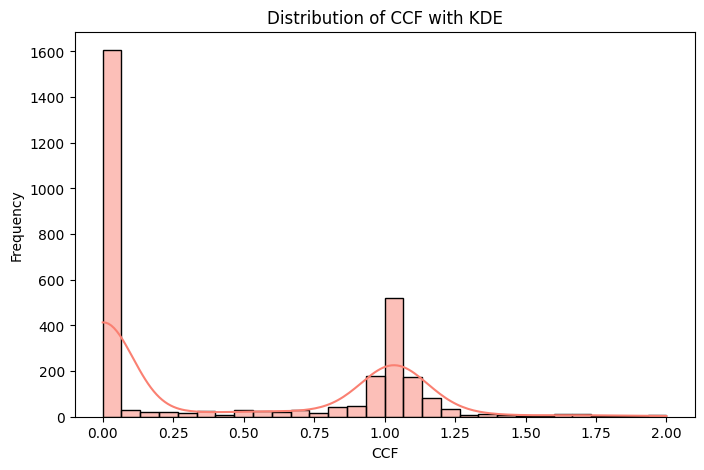

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: df['ccf'] already exists
# df = pd.DataFrame({'ccf': [...]})

# 1. Simple histogram using matplotlib
plt.figure(figsize=(8,5))
plt.hist(df[((df['group_label']=='group_2') & (df['ccf']<=2))]['ccf'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CCF')
plt.xlabel('CCF')
plt.ylabel('Frequency')
plt.show()

# 2. Using seaborn for a smoother look
plt.figure(figsize=(8,5))
sns.histplot(df[((df['group_label']=='group_2') & (df['ccf']<=2))]['ccf'], bins=30, kde=True, color='salmon')
plt.title('Distribution of CCF with KDE')
plt.xlabel('CCF')
plt.ylabel('Frequency')
plt.show()


In [7]:
df[((df['group_label'] == 'group_3') & (df['product']=='RP_2'))]

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,group_label,limit,balance,ead,avg_utilization_0m,ccf
798,b6a96561-3e62-438d-8d9b-59335ef1f9cd,2021-04-27,write_off_date,2020-04-27 00:00:00.000000,2023-05-30 16:45:30,RP_2,group_3,6000.0,5389.71,6193.00,0.898285,1.316243
807,6bd5d40b-f465-4804-b5e5-b95b5c42d327,2022-06-18,tbil_infocard_date,2021-06-18 00:00:00.000000,2023-06-09 08:13:11,RP_2,group_3,8000.0,5790.25,7517.18,0.723781,0.781505
1957,30adc348-8711-4772-8af0-72620563a9b0,2023-02-28,schufa_insolvency_date,2022-02-28 00:00:00.000000,2025-07-01 06:37:48,RP_2,group_3,6000.0,5875.31,3766.63,0.979218,0.000000
2831,c30d762e-70f9-4f7f-b7b5-b0a2f76b57e8,2024-01-17,tbil_infocard_date,2023-01-17 00:00:00.000000,2023-05-09 18:05:38,RP_2,group_3,500.0,0.00,498.33,0.000000,0.996660
2921,6b68c44b-ac2f-43f9-80a8-c8a468215900,2023-10-30,write_off_date,2022-10-30 00:00:00.000000,2023-05-19 14:22:07,RP_2,group_3,500.0,305.37,534.42,0.610740,1.176848
...,...,...,...,...,...,...,...,...,...,...,...,...
16576,16cccfe3-b035-454e-9eed-d9580eb4352a,2025-06-08,dpd_90_date,2024-06-08 00:00:00.000000,2025-03-28 22:57:46,RP_2,group_3,6000.0,4641.86,11439.68,0.773643,5.005242
16579,ce5e3eb9-515f-4e96-a223-f194bb25d0db,2023-11-28,write_off_date,2023-03-20 10:38:42.321708,2023-05-23 20:56:49,RP_2,group_3,500.0,0.00,400.13,0.000000,0.800260
16591,7982e669-e6fb-405b-bcd1-5c6c3a0ce0fc,2025-09-29,write_off_date,2024-09-29 00:00:00.000000,2024-10-07 15:14:39,RP_2,group_3,6000.0,5995.70,5124.14,0.999283,0.000000
16594,59e69af4-0041-4e22-9ed5-fad1a547febe,2024-06-28,write_off_date,2023-06-29 00:00:00.000000,2023-11-08 13:34:02,RP_2,group_3,6000.0,5092.84,4677.93,0.848807,0.000000


In [50]:
df[df['user_id']=='0b1b8e52-4d91-4001-a01e-64b7c363dda5']

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,group_label,limit,balance,ead,avg_utilization_0m,ccf
14527,0b1b8e52-4d91-4001-a01e-64b7c363dda5,2024-11-22,write_off_date,2023-11-23,2024-09-10 05:21:36,RP_2,group_3,3000.0,2191.61,2625.88,0.730537,0.537204


In [14]:
df[((df['product'] == 'RP_0') & (df['ead'] == 0))]

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,group_label,limit,balance,ead,utilization
3,3308cca1-2754-4882-915d-203ad5c8d480,2018-09-20,dunning_second_reminder_date,2017-09-20 00:00:00.000000,2019-01-01,RP_0,exluded,500.00,333.95,0.0,0.0
67,a34635eb-6843-4e5d-ad4d-b26192301d04,2022-06-08,dunning_second_reminder_date,2021-07-14 14:36:06.916174,2022-06-27,RP_0,exluded,2000.00,0.00,0.0,0.0
68,a34635eb-6843-4e5d-ad4d-b26192301d04,2022-06-08,dunning_second_reminder_date,2021-07-14 14:36:06.916174,2022-06-27,RP_0,exluded,2000.00,0.00,0.0,0.0
79,ab589110-e2f9-4835-9639-3a260fea61e2,2022-12-11,dunning_second_reminder_date,2021-12-11 00:00:00.000000,2022-12-29,RP_0,exluded,6000.00,5503.40,0.0,0.0
116,3fc4c8e0-e0f1-46a0-9704-8f1df9fb0d91,2022-06-03,dunning_second_reminder_date,2021-06-03 00:00:00.000000,2022-06-22,RP_0,exluded,6000.00,5959.56,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16935,579f5d14-4c76-460c-befa-970f1ceb92ec,2025-05-09,write_off_date,2025-02-14 09:06:28.650181,2025-02-14,RP_0,group_3,32.99,0.00,0.0,0.0
16972,76eab0a0-3286-4bc1-aa9d-498de89ad003,2019-12-10,schufa_insolvency_date,2018-12-10 00:00:00.000000,2019-03-12,RP_0,group_3,250.00,233.10,0.0,0.0
16986,6efea063-0238-4e1b-9864-f7d0ab19980f,2024-12-28,dpd_90_date,2023-12-29 00:00:00.000000,2025-02-14,RP_0,exluded,5979.99,5900.33,0.0,0.0
17076,658a7ec6-673f-4afb-9156-b442da934dd8,2024-04-10,write_off_date,2023-04-11 00:00:00.000000,2022-02-17,RP_0,group_3,2100.00,0.00,0.0,0.0


In [7]:
df[df['limit'] == 0]

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,limit,balance,ead


In [8]:
df[((df['limit'] != 0) & (df['product'] == 'RP_2'))]

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,limit,balance,ead
65,10fb606f-6ee9-4bf2-b29c-3cda32661e4f,2020-08-25,schufa_insolvency_date,2019-11-30 16:27:07.643950,2023-07-04 13:23:29,RP_2,250.00,0.00,0.00
128,157695b6-5d11-4176-bfb2-b952aedd62fc,2022-10-03,tbil_infocard_date,2022-04-14 09:30:07.208349,2023-07-20 11:49:20,RP_2,250.00,0.00,272.58
211,f848fb6a-2a18-4917-a489-381943c4f28f,2024-04-03,tbil_infocard_date,2023-06-02 04:37:04.665616,2025-03-10 09:03:26,RP_2,500.00,0.00,530.83
239,5f4f4e34-2067-4200-b25a-4ebe9bc630ef,2022-12-11,dunning_second_reminder_date,2021-12-11 00:00:00.000000,2025-09-05 12:11:54,RP_2,3250.00,3248.42,3373.44
250,36bcbba9-18e9-4332-82d9-ed813d2ebfc5,2023-07-03,tbil_infocard_date,2022-07-03 00:00:00.000000,2025-10-07 11:30:17,RP_2,148.55,0.00,175.51
...,...,...,...,...,...,...,...,...,...
11219,d632d120-2f3b-4a14-af36-4fe2036deb7a,2025-02-26,write_off_date,2024-10-01 07:27:18.456507,2024-12-04 09:19:23,RP_2,3000.00,0.00,0.00
11220,d632d120-2f3b-4a14-af36-4fe2036deb7a,2025-02-26,write_off_date,2024-10-01 07:27:18.456507,2024-12-04 09:19:58,RP_2,3000.00,0.00,0.00
11222,a8be4d53-1091-438c-98be-b331eb07b01a,2025-09-14,write_off_date,2024-11-13 09:59:20.554034,2025-03-12 11:40:59,RP_2,250.00,0.00,0.00
11274,c9e553a7-7fc7-4d68-8a6e-0be0ba2c2696,2025-05-23,dunning_second_reminder_date,2024-05-23 00:00:00.000000,2025-06-12 08:07:49,RP_2,6000.00,0.00,0.00


In [78]:
df[df['product'] == 'RP_1']

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,limit,balance,ead


In [37]:
df[df['user_id']=='66ac2518-286b-40a2-8d6c-beb4f8216c55']

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,limit,balance,ead
3424,66ac2518-286b-40a2-8d6c-beb4f8216c55,2022-05-01,dunning_second_reminder_date,2021-05-01,2022-05-16,RP,6000.0,0.0,5876.4


In [19]:
df[df['product'] == 'OD'].tail(50)

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,group_label,limit,balance,ead,avg_utilization_0m,ccf
17025,0b61180b-4e60-42b4-8ddb-2d156b9f4919,2025-05-23,crif_insolvency_date,2024-05-23 00:00:00.000000,NaT,OD,group_1,5900.00,5833.09,5585.84,0.988659,0.000000
17026,1e482324-1303-4ee1-8783-1b43f621f0f6,2025-05-24,crif_insolvency_date,2024-05-24 00:00:00.000000,NaT,OD,group_1,3000.00,2998.71,2844.05,0.999570,0.000000
17027,fac2eb1f-e835-4c8e-ad51-e766acb5aaa9,2025-05-24,crif_insolvency_date,2024-05-24 00:00:00.000000,NaT,OD,group_1,250.00,0.00,0.00,0.000000,0.000000
17028,48fac26e-b8d7-476b-81f1-5897cf10244c,2025-05-24,crif_insolvency_date,2024-05-24 00:00:00.000000,NaT,OD,group_1,1500.00,1454.77,1498.99,0.969847,0.999327
17029,54f6da7d-06bd-4aec-b7f6-541a3894752d,2025-05-26,dunning_second_reminder_date,2024-05-26 00:00:00.000000,NaT,OD,group_1,10000.00,9704.17,0.00,0.970417,0.000000
17031,41fe89ff-48aa-4615-b3af-afe28254c973,2025-06-28,dpd_90_date,2024-06-28 00:00:00.000000,NaT,OD,group_1,7750.00,4408.35,8024.77,0.568819,1.082226
17032,c4cccd83-f4c4-4662-b3ef-31774210ce1b,2025-06-28,dpd_90_date,2024-06-28 00:00:00.000000,NaT,OD,group_1,6000.00,5998.42,6191.95,0.999737,1.031992
17033,592a0c8d-810d-42ef-8014-da6dcc5a6b70,2025-06-28,dpd_90_date,2024-06-28 00:00:00.000000,NaT,OD,group_1,4240.00,2952.03,4372.95,0.696233,1.103224
17034,74222c04-6ae0-4a19-9a3c-a7c45ca2dafe,2025-07-19,dunning_second_reminder_date,2025-05-18 21:20:39.726827,NaT,OD,group_2,1750.00,0.00,0.00,0.000000,0.000000
17035,87601357-e139-45bc-bd65-5549346b08c5,2025-07-21,dpd_90_date,2024-07-21 00:00:00.000000,NaT,OD,group_1,10000.00,9824.59,10009.00,0.982459,1.000900


In [27]:
df[((df['ead'] == 0) & (df['balance'] > df['ead']))].tail(50)

,user_id,default_date,default_reason,reference_date,rp_creation_date,product,limit,balance,ead
19095,c96e91b1-12c8-4c0d-b69b-d3434ad57006,2019-08-08,n26_insolvency_date,2018-11-27 11:21:10.771000,NaT,OD,250.0,83.59,0.0
19096,d916e487-6620-4803-b093-3f614c67bd1a,2025-06-02,write_off_date,2024-06-02 00:00:00.000000,2025-01-09 21:50:44,RP,250.0,223.12,0.0
19101,a7d671e6-2841-4a2c-bd43-ec7919bf71d6,2025-07-29,write_off_date,2024-07-29 00:00:00.000000,2024-07-08 00:00:00,RP,3240.0,3239.13,0.0
19102,a7d671e6-2841-4a2c-bd43-ec7919bf71d6,2025-07-29,write_off_date,2024-07-29 00:00:00.000000,2025-01-28 20:42:21,RP,3240.0,3239.13,0.0
19111,4f79b6f8-1adb-4a53-9b5c-8736bb8d4d9f,2025-02-08,tbil_infocard_date,2024-02-09 00:00:00.000000,2024-03-06 13:08:31,RP,5600.0,5235.75,0.0
19112,4f79b6f8-1adb-4a53-9b5c-8736bb8d4d9f,2025-02-08,tbil_infocard_date,2024-02-09 00:00:00.000000,2024-01-10 00:00:00,RP,5600.0,5235.75,0.0
19113,595bcec1-1924-41cd-bfc0-4e3d471f8732,2018-11-27,schufa_insolvency_date,2017-11-27 00:00:00.000000,NaT,OD,1500.0,779.78,0.0
19114,0a9fda67-7062-49b0-8f74-0a6689cf5260,2025-07-29,write_off_date,2024-07-29 00:00:00.000000,2025-01-19 17:13:48,RP,2750.0,2776.20,0.0
19129,71405ee1-9e59-4b76-8838-06779ea7646f,2024-12-12,schufa_insolvency_date,2023-12-13 00:00:00.000000,NaT,OD,3000.0,2993.36,0.0
19137,de62fa96-48b7-4158-892e-61c7f4a289a8,2024-03-29,write_off_date,2023-03-30 00:00:00.000000,2023-08-30 20:23:51,RP,500.0,468.01,0.0


In [21]:
df[((df['limit'] != 0) & (df['balance'] <= df['ead']))].tail(50)

,user_id,default_date,default_reason,reference_date,limit,balance,ead,date_diff_days,diff_bucket
19096,915144ce-bb2e-4f8e-8a2b-f6cf5a3766c6,2019-07-11,schufa_insolvency_date,2018-08-03 15:11:52.999000,250.0,0.00,0.00,341,180-365
19099,54e9dec3-f734-4597-ba14-ac110f81856c,2019-10-07,schufa_insolvency_date,2018-11-26 11:21:08.535000,250.0,0.00,0.00,314,180-365
19104,260d16e1-b1b5-4c17-995f-36c699e9f27c,2025-08-20,schufa_insolvency_date,2024-08-17 00:00:00.000000,700.0,0.00,0.00,368,>365
19106,a90be91f-c7f7-438e-b239-7e734ff5a5d2,2018-09-12,schufa_insolvency_date,2018-01-11 17:23:17.612000,250.0,0.00,0.00,243,180-365
19107,b229281d-c030-4cc1-b892-c5dab4bc7345,2019-08-27,schufa_insolvency_date,2018-08-24 00:00:00.000000,NaN,0.00,0.00,368,>365
19111,43a56733-ee95-4bd0-be27-17229e72bed1,2025-08-03,dpd_90_date,2025-01-29 16:15:17.493433,1000.0,0.00,0.00,185,180-365
19113,116aa8a3-235a-4298-b263-c183a36c6e9c,2023-02-14,schufa_insolvency_date,2022-02-11 00:00:00.000000,3750.0,0.00,0.00,368,>365
19116,74c2360c-858e-4d9f-81ec-faafdb47ea4f,2022-12-28,schufa_insolvency_date,2022-02-27 19:28:07.543111,6000.0,0.00,0.00,303,180-365
19122,8f50f82b-7a3b-4107-9bee-0059c687c9f1,2024-05-18,dpd_90_date,2023-05-16 00:00:00.000000,10000.0,3945.13,10472.10,368,>365
19123,c704eab7-e84b-4bc7-a15d-25125b08e3d8,2024-05-28,dunning_second_reminder_date,2023-05-26 00:00:00.000000,250.0,245.47,279.37,368,>365


In [ ]:
df[df['limit'] == 0] #delete

,user_id,default_date,default_reason,reference_date,limit,balance,ead,date_diff_days,diff_bucket
14,f1df1ad7-b264-411c-a31a-8bc7c84bcbd6,2020-04-15,write_off_date,2019-04-13,0.0,0.0,17.01,368,>365
80,28a19fe3-33c6-489c-a6be-0baa6095b425,2022-01-23,dunning_second_reminder_date,2021-01-20,0.0,0.0,12.18,368,>365
82,f340ea50-4197-4346-b5ef-aaeee9ddd5cb,2022-03-31,dpd_90_date,2021-03-28,0.0,0.0,113.70,368,>365
97,0e513d80-1be0-4955-bdf9-b1ea4b5941ad,2023-02-23,dunning_second_reminder_date,2022-02-20,0.0,0.0,20.83,368,>365
101,b6ebfb4f-2372-4b4d-a65b-3d03bca7fc76,2023-04-01,dunning_second_reminder_date,2022-03-29,0.0,0.0,17.16,368,>365
...,...,...,...,...,...,...,...,...,...
19182,050a923b-6c96-43b9-b31d-209b5662e033,2023-03-21,schufa_insolvency_date,2022-03-18,0.0,0.0,0.00,368,>365
19184,6e65a0ff-c436-4d22-abbf-985d6a7c17b3,2025-04-30,n26_insolvency_date,2024-04-27,0.0,0.0,0.00,368,>365
19188,8083fff3-2f70-49a6-95e6-54fb2be56b0a,2024-12-05,n26_insolvency_date,2023-12-03,0.0,0.0,0.00,368,>365
19191,f43f64ee-87c6-4f9e-86dc-4b521f8c4807,2023-01-17,schufa_insolvency_date,2022-01-14,0.0,0.0,0.00,368,>365


In [11]:
df[df['reference_date'] > df['default_date']]

,user_id,default_date,default_reason,reference_date,limit,balance,ead
1614,da2a5d33-e58b-4123-81a0-5cdc55bbd294,2019-05-27,dunning_downgrade_date,2019-05-27 12:52:55.698000,250.0,18.55,18.55
1864,93a974b2-ae26-46de-8ade-c089b7232760,2018-09-06,dunning_second_reminder_date,2018-09-06 22:08:35.778000,250.0,17.33,17.33
4764,16c5585f-3524-486f-850f-f1c414e03283,2023-06-30,dunning_second_reminder_date,2023-06-30 13:06:37.182624,48.0,50.34,50.34
9247,b085bb07-61e4-4627-a893-0fe1db7f5588,2025-04-17,dunning_closure_date,2025-04-17 10:17:15.072797,853.0,0.00,489.13
9248,b085bb07-61e4-4627-a893-0fe1db7f5588,2025-04-17,dunning_closure_date,2025-04-17 10:17:15.072797,853.0,0.00,489.13
9666,dc41ca31-5287-4663-9ed0-67d88f6a020d,2019-03-25,schufa_insolvency_date,2019-03-25 11:26:59.706000,250.0,0.00,0.00
10268,594ef481-1b27-48e9-803c-1c782b56683d,2022-05-03,schufa_insolvency_date,2022-05-03 13:47:50.163412,3000.0,0.00,0.00
15257,333c9ef0-44bf-4f66-bd4e-ea57760bc986,2020-03-04,schufa_insolvency_date,2020-03-04 04:56:22.919660,0.0,0.00,0.00
16786,08d59003-3287-4438-aa0b-f6aefb14640b,2022-04-12,schufa_insolvency_date,2022-04-12 14:56:28.142050,3000.0,0.00,0.00
18765,fda4fca5-680c-439d-8fcb-2871c9c5d28c,2023-04-28,schufa_insolvency_date,2023-04-28 13:15:25.794512,500.0,0.00,0.00


In [13]:
df[df['limit']>10000]

,user_id,default_date,default_reason,reference_date,limit,balance,ead
13200,d57f81a9-aafd-4e2d-a87f-77f15d5e7142,2025-07-15,schufa_insolvency_date,2025-01-20 04:37:37.799997,10001.0,0.00,10015.21
18379,c4743877-22a1-4e20-a361-caaf6b153388,2025-03-18,schufa_insolvency_date,2025-01-03 17:53:24.213428,10264.0,0.00,953.92
18782,df5e9b5e-dbe5-4ee7-9ddc-dce636131f32,2025-07-14,write_off_date,2025-04-12 10:54:44.775443,12529.0,4587.84,0.00


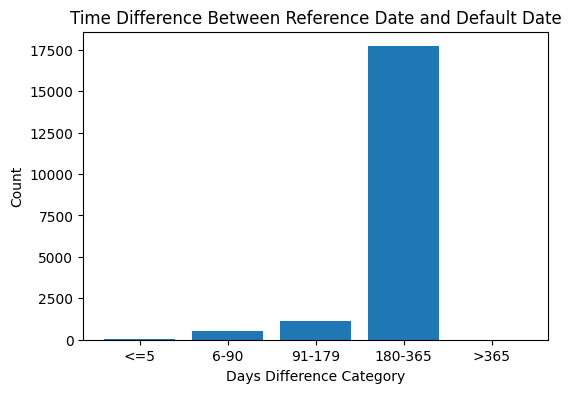

In [66]:
df['reference_date'] = pd.to_datetime(df['reference_date'])
df['default_date'] = pd.to_datetime(df['default_date'])

# Calculate difference in days
df['date_diff_days'] = (df['default_date'] - df['reference_date']).dt.days

# Categorize into buckets
df['diff_bucket'] = pd.cut(
    df['date_diff_days'],
    bins=[-float('inf'), 5, 90, 179, 365, float('inf')],
    labels=['<=5', '6-90', '91-179', '180-365', '>365']
)

# Plot as bar chart (count of each bucket)
bucket_counts = df['diff_bucket'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(bucket_counts.index, bucket_counts.values)
plt.title('Time Difference Between Reference Date and Default Date')
plt.xlabel('Days Difference Category')
plt.ylabel('Count')
plt.show()


In [15]:
df[df['user_id']=='50e92f9f-a08c-40a3-a9ad-7b4f0075f92e']

,user_id,default_date,default_reason,reference_date,limit,balance,ead,date_diff_days,diff_bucket
16494,50e92f9f-a08c-40a3-a9ad-7b4f0075f92e,2024-01-16,tbil_infocard_date,2023-01-13,10000.0,8565.86,10332.48,368,>365


In [16]:
df[df['user_id']=='e1099948-6282-419d-8ad0-b1ee5edfd1e7']

,user_id,default_date,default_reason,reference_date,limit,balance,ead,date_diff_days,diff_bucket
1891,e1099948-6282-419d-8ad0-b1ee5edfd1e7,2022-12-11,dunning_second_reminder_date,2021-12-08,500.0,485.67,510.53,368,>365


In [17]:
df[df['user_id']=='1544ce35-0d6d-4774-9691-c84cac22388c']

,user_id,default_date,default_reason,reference_date,limit,balance,ead,date_diff_days,diff_bucket
15752,1544ce35-0d6d-4774-9691-c84cac22388c,2022-12-16,n26_insolvency_date,2021-12-13,0.0,0.0,0.0,368,>365


In [56]:
df[df['user_id'].duplicated()]

,user_id,default_date,default_reason,reference_date,limit,rp_creation_date,balance,ead
1,11ffcdc5-1838-4851-8b8b-fa57e8f30b03,2018-01-31,schufa_insolvency_date,2018-05-12 04:52:26.837,1500.0,2018-05-21 09:39:07.514999,1414.56,1494.33
2,11ffcdc5-1838-4851-8b8b-fa57e8f30b03,2018-01-31,schufa_insolvency_date,2018-05-12 04:52:26.837,1500.0,2018-05-21 09:39:07.514999,1414.56,1494.33
3,11ffcdc5-1838-4851-8b8b-fa57e8f30b03,2018-01-31,schufa_insolvency_date,2018-05-12 04:52:22.777,1500.0,2018-05-12 04:52:26.836999,1414.56,1494.33
4,11ffcdc5-1838-4851-8b8b-fa57e8f30b03,2018-01-31,schufa_insolvency_date,2018-05-12 04:52:22.777,1500.0,2018-05-12 04:52:26.836999,1414.56,1494.33
5,11ffcdc5-1838-4851-8b8b-fa57e8f30b03,2018-01-31,schufa_insolvency_date,2018-05-12 04:52:20.391,1500.0,2018-05-12 04:52:22.776999,1414.56,1494.33
...,...,...,...,...,...,...,...,...
29672,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28 00:00:00.000,0.0,2019-01-18 07:09:57.347999,0.00,0.00
29673,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28 00:00:00.000,0.0,2019-01-21 12:38:17.254999,0.00,0.00
29674,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28 00:00:00.000,0.0,2019-05-05 11:11:45.120999,0.00,0.00
29675,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28 00:00:00.000,0.0,2019-05-24 11:37:01.609999,0.00,0.00


In [57]:
df[df['user_id'] == 'a0b2bf69-616f-4dc3-93b6-e501697e1156']

,user_id,default_date,default_reason,reference_date,limit,rp_creation_date,balance,ead
29648,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2023-05-09 00:00:00.000000,0.0,0.0
29649,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-07-19 13:31:59.515999,0.0,0.0
29650,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-07-19 13:32:02.839999,0.0,0.0
29651,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-07-19 13:32:04.361999,0.0,0.0
29652,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-07-25 05:29:32.369999,0.0,0.0
29653,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-07-25 05:29:34.618999,0.0,0.0
29654,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-07-25 05:29:36.143999,0.0,0.0
29655,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-08-01 01:04:05.110999,0.0,0.0
29656,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-08-01 07:51:22.302999,0.0,0.0
29657,a0b2bf69-616f-4dc3-93b6-e501697e1156,2024-06-30,dpd_90_date,2023-06-28,0.0,2018-08-01 07:51:25.279999,0.0,0.0


In [74]:
df[df['user_id']=='19b7e230-6563-4603-8836-b4963eae44cd']

,user_id,default_date,default_reason,reference_date,limit_amount
14133,19b7e230-6563-4603-8836-b4963eae44cd,2025-08-28,write_off_date,2025-03-27 16:25:03.955301,250.0


In [79]:
df[df['diff_bucket'] == '6-90']

,user_id,default_date,default_reason,reference_date,limit_amount,date_diff_days,diff_bucket
50,60360b49-7d88-4d4b-a87f-1240353d5991,2022-05-28,dunning_second_reminder_date,2022-03-07 15:57:49.650408,500.0,81,6-90
139,647ce3bb-80c3-4d5e-a067-28d876464fbb,2025-07-01,schufa_insolvency_date,2025-05-16 18:02:44.244383,250.0,45,6-90
186,120bad37-9364-4ebd-9bec-97b0fbaf3ad6,2025-07-05,dunning_second_reminder_date,2025-05-04 07:02:51.690631,250.0,61,6-90
213,4b50332c-7980-427b-b0bc-b49241dbd023,2020-10-06,schufa_insolvency_date,2020-09-13 11:15:41.966005,6000.0,22,6-90
217,53167a3b-d45b-428c-a6f5-4c3e77d1458d,2019-02-12,schufa_insolvency_date,2019-01-29 01:01:42.997000,250.0,13,6-90
...,...,...,...,...,...,...,...
19081,fca5f214-1126-4131-bc63-2395814e4666,2022-01-28,schufa_insolvency_date,2021-12-23 07:20:13.113454,500.0,35,6-90
19091,cf733b58-5819-44d5-b6cf-fdac2e674f20,2020-04-05,schufa_insolvency_date,2020-03-05 04:46:53.693847,0.0,30,6-90
19102,e4cfd6ce-86ff-46d0-96dd-af4363f56dfb,2019-12-07,dunning_second_reminder_date,2019-09-08 13:57:14.203580,250.0,89,6-90
19116,fe32b882-8b65-44be-a8bc-995ddc676212,2018-02-03,schufa_insolvency_date,2018-01-22 08:32:17.989000,500.0,11,6-90


In [2]:
from src.data_collection import DataCollector

collector = DataCollector()
merged_df = collector.collect_and_store(merge_on="user_id", how="left")

/Users/ilya.katliarou/Documents/CCF/src/db_connect.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, self.conn)


Saved data: src/data/training/raw/base.parquet


/Users/ilya.katliarou/Documents/CCF/src/db_connect.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, self.conn)


Saved data: src/data/training/raw/target.parquet
Saved data: src/data/training/processed/merged_data.parquet


In [13]:
pd.read_parquet("/Users/ilya.katliarou/Documents/CCF/src/data/training/raw/target.parquet")

,user_id,rev_timestamp,end_timestamp,enabled,max_amount_cents,user_amount_cents,potential_amount_cents,table_flag,aud_order,etl_updated
0,0002b0f3-a5a9-4707-8e82-65a5c550357e,2020-04-11 10:21:03.627000+00:00,2020-04-11 10:21:03.775134+00:00,0,25000.0,0.0,25000.0,ddb,1,2025-10-10 11:06:00
1,0002b0f3-a5a9-4707-8e82-65a5c550357e,2020-04-11 10:21:03.775134+00:00,2020-04-11 10:21:05.508550+00:00,0,0.0,0.0,0.0,pu,2,2025-10-10 11:06:00
2,0002b0f3-a5a9-4707-8e82-65a5c550357e,2020-04-11 10:21:05.508551+00:00,2020-08-01 21:51:14.440483+00:00,0,80000000.0,0.0,80000000.0,pu,3,2025-10-10 11:06:00
3,0002b0f3-a5a9-4707-8e82-65a5c550357e,2020-08-01 21:51:14.440484+00:00,2020-09-01 06:50:22.828239+00:00,0,100000000.0,0.0,100000000.0,pu,4,2025-10-10 11:06:00
4,0002b0f3-a5a9-4707-8e82-65a5c550357e,2020-09-01 06:50:22.828240+00:00,2020-10-01 03:03:11.093870+00:00,0,60000000.0,0.0,60000000.0,pu,5,2025-10-10 11:06:00
...,...,...,...,...,...,...,...,...,...,...
9994492,fff0bae3-75b3-472f-a940-aaeda18d433a,2020-02-14 02:00:03.836241+00:00,2100-01-01 00:00:00+00:00,0,0.0,0.0,0.0,pu,1,2025-10-10 11:06:00
9994493,fff19021-8328-473a-a51f-bdb3d23d7b23,2018-11-24 11:28:15.117000+00:00,2019-07-08 14:53:44.520337+00:00,0,25000.0,0.0,25000.0,ddb,1,2025-10-10 11:06:00
9994494,fff19021-8328-473a-a51f-bdb3d23d7b23,2019-07-08 14:53:44.520337+00:00,2100-01-01 00:00:00+00:00,0,2500000.0,0.0,2500000.0,pu,2,2025-10-10 11:06:00
9994495,fff5211f-3b92-480f-b3dc-d0523a217985,2019-07-24 10:28:30.155388+00:00,2020-03-06 11:20:24.939150+00:00,0,0.0,0.0,0.0,pu,1,2025-10-10 11:06:00


In [8]:
import os

In [9]:
os.getcwd()

'/Users/ilya.katliarou/Documents/CCF'

In [27]:
rps_data = pd.read_csv("Monthly Credit Tracker - For Ilya.csv")

In [36]:
rps_data_save = rps_data.iloc[:,1:].copy()

In [ ]:
rps_data_save

,Status,User ID,"Reason (manually added, not 100% clear)",Created at
0,OFF,8e1f9892-a7ec-4134-a648-7bddbfaddaa1,1_Cancelled,27/04/2017
1,OFF,8e1f9892-a7ec-4134-a648-7bddbfaddaa1,1_Cancelled,27/04/2017
2,OFF,b28d05ce-af62-413f-9e47-407d52eb213c,3_Repaid,27/04/2017
3,OFF,0c150259-4427-4df5-b622-d7076ae29637,3_Repaid,27/04/2017
4,OFF,3dfa7082-5940-4037-93ab-1ec2b12fc9a0,3_Repaid,24/05/2017
...,...,...,...,...
5684,OFF,f63a9e01-5ba6-472e-abf1-a8777eb035b7,1_Cancelled,28/09/2017
5685,OFF,bbb613bf-fbc4-440b-8f20-db148b2155db,1_Cancelled,28/12/2017
5686,OFF,2451c0e2-edb3-47a4-9851-9226c4c05ebf,1_Cancelled,29/01/2018
5687,OFF,54d790dc-2a5e-4604-9b96-900266b3f70f,1_Cancelled,30/10/2017


In [42]:
rps_data_save = rps_data_save.rename(columns={
    "Status": "status",
    "User ID": "user_id",
    "Reason (manually added, not 100% clear)": "reason",
    "Created at": "creation_date",
})

In [44]:
rps_data_save['creation_date'] = pd.to_datetime(rps_data_save['creation_date'], dayfirst=True)

In [45]:
rps_data_save

,status,user_id,reason,creation_date
0,OFF,8e1f9892-a7ec-4134-a648-7bddbfaddaa1,1_Cancelled,2017-04-27
1,OFF,8e1f9892-a7ec-4134-a648-7bddbfaddaa1,1_Cancelled,2017-04-27
2,OFF,b28d05ce-af62-413f-9e47-407d52eb213c,3_Repaid,2017-04-27
3,OFF,0c150259-4427-4df5-b622-d7076ae29637,3_Repaid,2017-04-27
4,OFF,3dfa7082-5940-4037-93ab-1ec2b12fc9a0,3_Repaid,2017-05-24
...,...,...,...,...
5684,OFF,f63a9e01-5ba6-472e-abf1-a8777eb035b7,1_Cancelled,2017-09-28
5685,OFF,bbb613bf-fbc4-440b-8f20-db148b2155db,1_Cancelled,2017-12-28
5686,OFF,2451c0e2-edb3-47a4-9851-9226c4c05ebf,1_Cancelled,2018-01-29
5687,OFF,54d790dc-2a5e-4604-9b96-900266b3f70f,1_Cancelled,2017-10-30


In [47]:
rps_data_save.to_parquet("/Users/ilya.katliarou/Documents/CCF/rp_contracts_dates.parquet", index=False)